In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SOL-DATA.csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume SOL,Volume USD
0,1.722470e+12,8/1/2024 0:00,SOL/USD,171.670,172.800,157.880,167.401,43477.825900,7.278232e+06
1,1.722380e+12,7/31/2024 0:00,SOL/USD,179.219,184.344,171.550,171.670,16404.617540,2.816181e+06
2,1.722300e+12,7/30/2024 0:00,SOL/USD,182.640,184.644,175.477,179.219,14327.832920,2.567820e+06
3,1.722210e+12,7/29/2024 0:00,SOL/USD,184.977,193.815,181.634,182.640,43437.611750,7.933445e+06
4,1.722120e+12,7/28/2024 0:00,SOL/USD,183.629,186.605,181.235,184.977,7887.048626,1.458923e+06


In [3]:
df.shape

(1354, 9)

In [4]:
df.describe()

,unix,open,high,low,close,Volume SOL,Volume USD
count,1.354000e+03,1354.000000,1354.00000,1354.000000,1354.000000,1354.000000,1.354000e+03
mean,1.675336e+12,54.005045,56.33619,51.883234,54.176617,45029.621820,2.067285e+06
std,2.219729e+10,47.346288,49.01932,45.537322,47.396423,61162.363996,2.426411e+06
min,1.643770e+12,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.658192e+12,21.892250,22.65100,21.147250,21.918250,11615.228387,3.704954e+05
50%,1.668435e+12,32.604000,33.94900,31.837000,32.806000,27360.885700,1.325541e+06
75%,1.693248e+12,83.925500,88.81500,80.841500,84.115000,56584.781610,2.994318e+06
max,1.722470e+12,202.675000,209.88900,193.921000,202.675000,721029.777800,1.831770e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        1354 non-null   float64
 1   date        1354 non-null   object 
 2   symbol      1354 non-null   object 
 3   open        1354 non-null   float64
 4   high        1354 non-null   float64
 5   low         1354 non-null   float64
 6   close       1354 non-null   float64
 7   Volume SOL  1354 non-null   float64
 8   Volume USD  1354 non-null   float64
dtypes: float64(7), object(2)
memory usage: 95.3+ KB


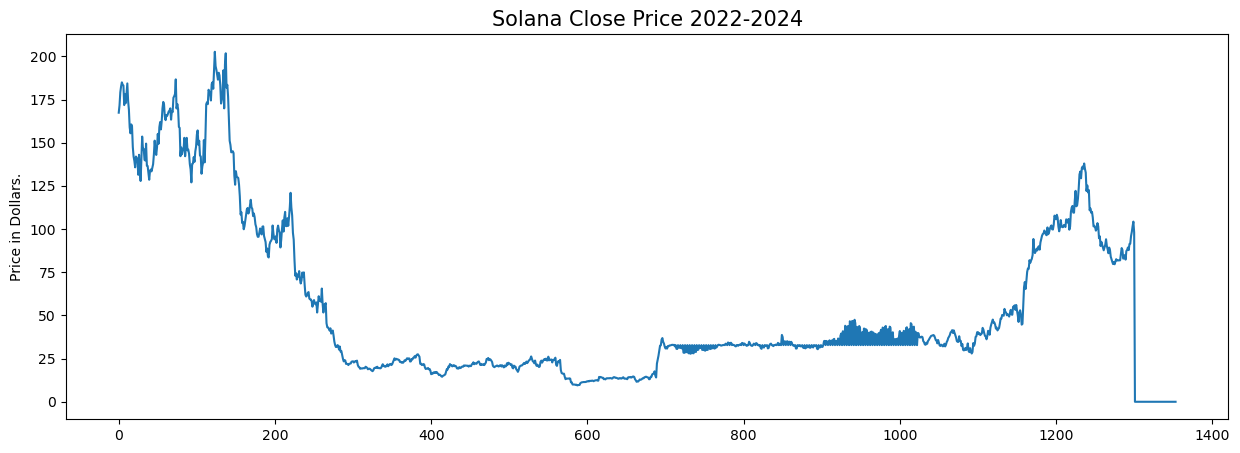

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Solana Close Price 2022-2024', fontsize = 15)
plt.ylabel('Price in Dollars.')
plt.show()

In [15]:
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume SOL    0
Volume USD    0
dtype: int64

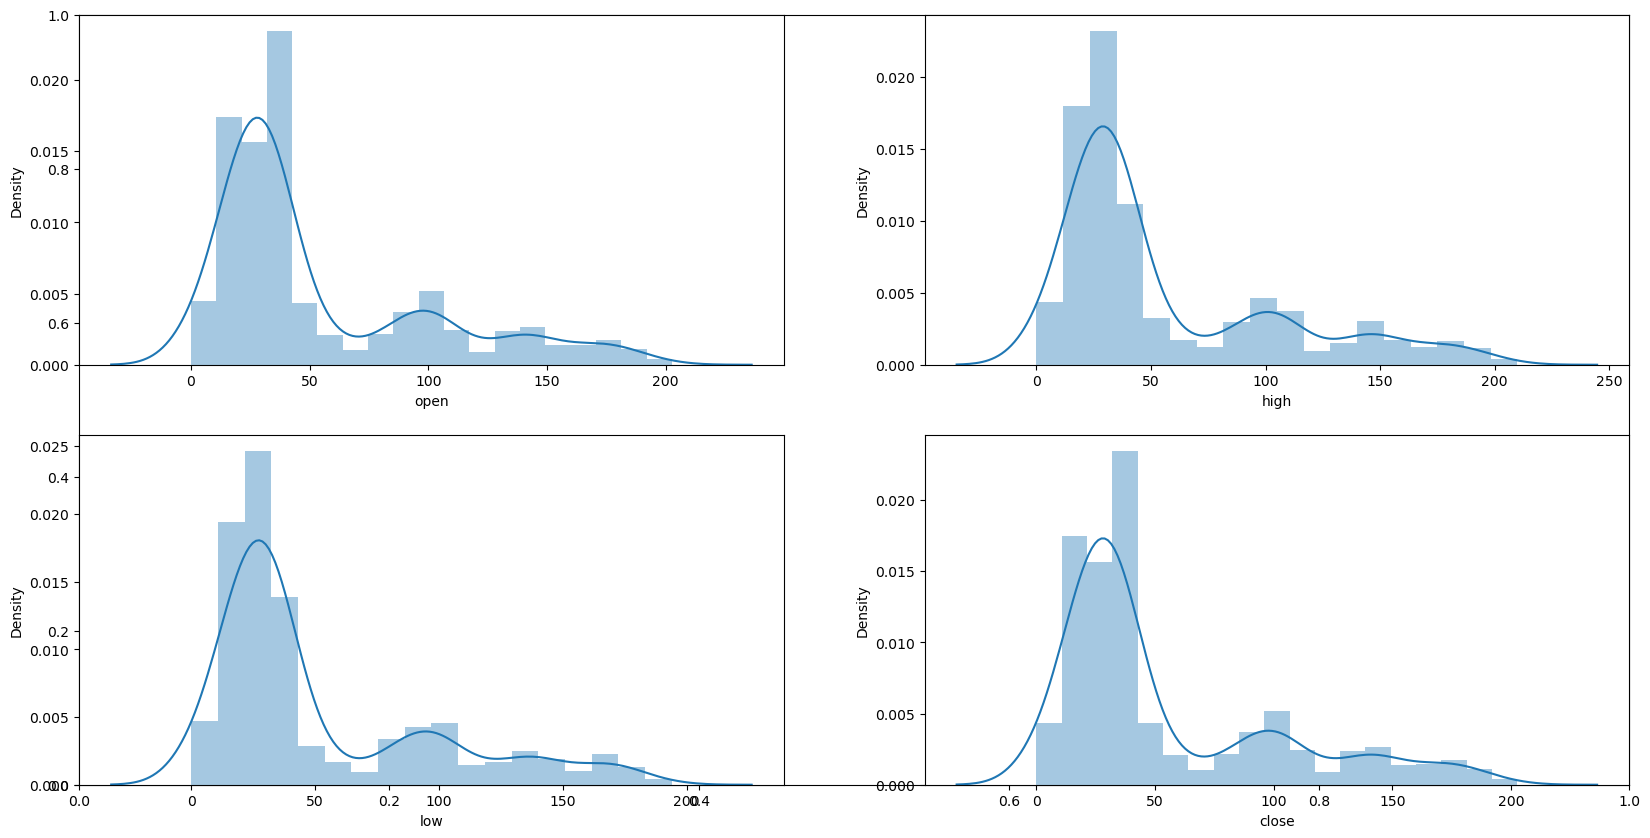

In [17]:
features = ['open', 'high', 'low', 'close']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.distplot(df[col])
plt.show()

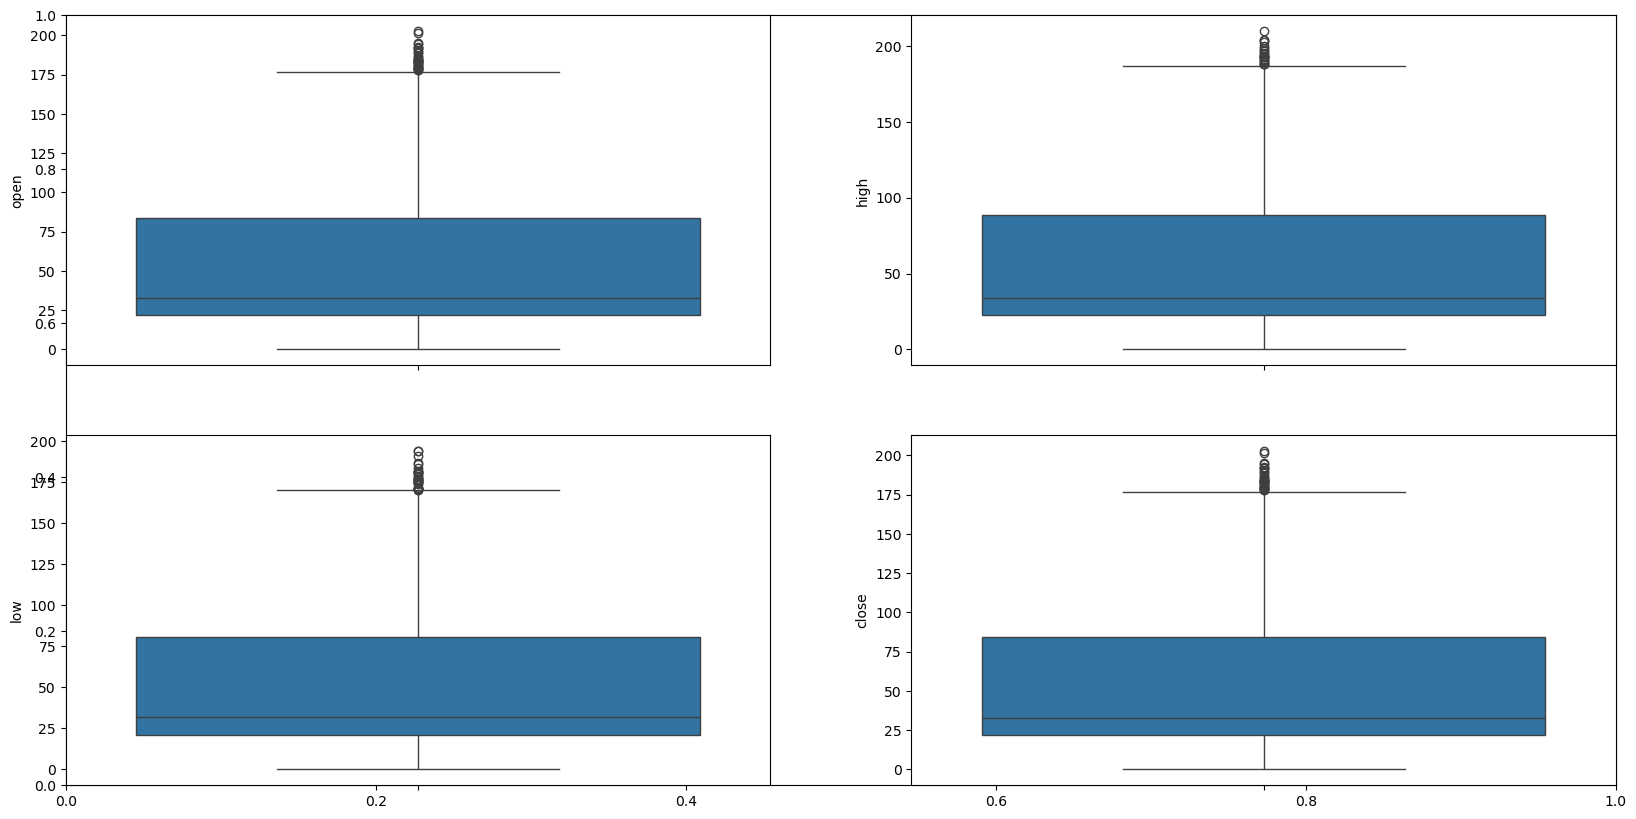

In [18]:
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.boxplot(df[col])
plt.show()

In [20]:
realdate = df['date'].str.split(' ', expand = True)
df['date'] = realdate[0]
splitted = df['date'].str.split('/', expand = True)

df['month'] = splitted[0].astype('int')
df['day'] = splitted[1].astype('int')
df['year'] = splitted[2].astype('int')

In [23]:
df['year']

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
1349    2022
1350    2022
1351    2022
1352    2022
1353    2022
Name: year, Length: 1354, dtype: int32

In [24]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,unix,date,symbol,open,high,low,close,Volume SOL,Volume USD,month,day,year,is_quarter_end
0,1.722470e+12,8/1/2024,SOL/USD,171.670,172.800,157.880,167.401,43477.825900,7.278232e+06,8,1,2024,0
1,1.722380e+12,7/31/2024,SOL/USD,179.219,184.344,171.550,171.670,16404.617540,2.816181e+06,7,31,2024,0
2,1.722300e+12,7/30/2024,SOL/USD,182.640,184.644,175.477,179.219,14327.832920,2.567820e+06,7,30,2024,0
3,1.722210e+12,7/29/2024,SOL/USD,184.977,193.815,181.634,182.640,43437.611750,7.933445e+06,7,29,2024,0
4,1.722120e+12,7/28/2024,SOL/USD,183.629,186.605,181.235,184.977,7887.048626,1.458923e+06,7,28,2024,0


In [29]:
df['open-close'] = df['open'] -df['close']
df['low-high'] =df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

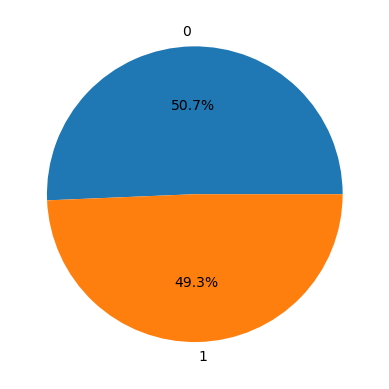

In [31]:
plt.pie(df['target'].value_counts().values,
       labels = [0, 1], autopct='%1.1f%%')
plt.show()

In [33]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot = True, cbar = False)

ValueError: could not convert string to float: 'SOL/USD'

<Figure size 1000x1000 with 0 Axes>

In [38]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022
)
print(X_train.shape, X_valid.shape)

(1218, 3) (136, 3)


In [48]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.8403958724860264
Validation Accuracy :  0.8113661202185793

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.6098679616153064
Validation Accuracy :  0.6260109289617487

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

In [60]:
metrics.ConfusionMatrixDisplay(models[0], X_valid, Y_valid)
plt.show()

TypeError: ConfusionMatrixDisplay.__init__() takes 2 positional arguments but 4 were given